## IMPORTING DATASET

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## LOADING THE DATASET

In [4]:
df = pd.read_csv("UberDataset.csv")
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


## UNDERSTANDING THE DATASET

In [4]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [7]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MILES,1156.0,21.115398,359.299007,0.5,2.9,6.0,10.4,12204.7


In [11]:
df.shape

(1156, 7)

In [12]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [20]:
df.dropna(subset=['END_DATE'], inplace=True)

In [21]:
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [23]:
df['PURPOSE'].fillna("NA", inplace=True)

In [24]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

## EXPLORATORY DATA ANALYSIS

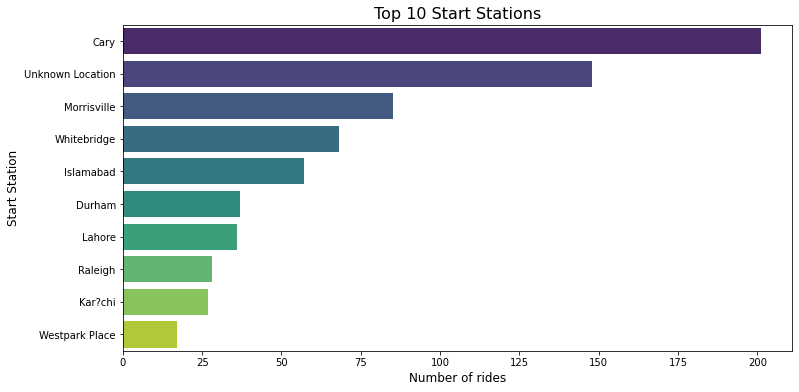

In [15]:
top_10_stopStations = df["START"].value_counts()[:10].sort_values(ascending=True)
top_10_stopStations

top_10_startStations = df["START"].value_counts()[:10]

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_startStations.values, y=top_10_startStations.index, palette='viridis')
plt.title('Top 10 Start Stations', fontsize=16)
plt.xlabel('Number of rides', fontsize=12)
plt.ylabel('Start Station', fontsize=12)
plt.show()


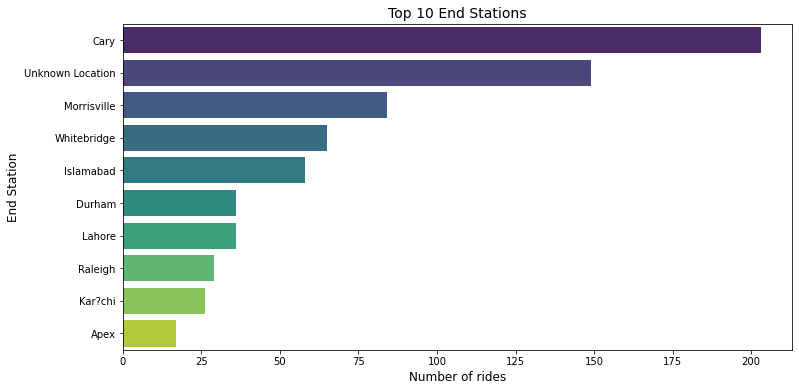

In [26]:
top_10_EndStations = df["STOP"].value_counts()[:10].sort_values(ascending=True)
top_10_EndStations

top_10_EndStations = df["STOP"].value_counts()[:10]

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_EndStations.values, y=top_10_EndStations.index, palette='viridis')
plt.title('Top 10 End Stations', fontsize=14)
plt.xlabel('Number of rides', fontsize=12)
plt.ylabel('End Station', fontsize=12)
plt.show()

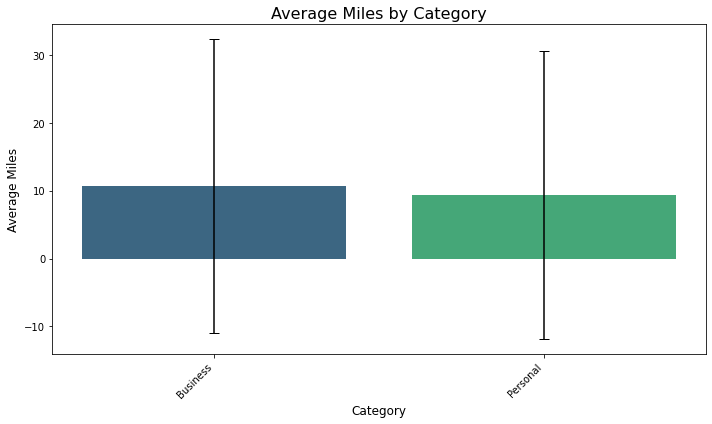

In [18]:
average_miles = df.groupby('CATEGORY')['MILES'].mean()
std_miles = df.groupby('CATEGORY')['MILES'].std()

plt.figure(figsize=(10, 6))
sns.barplot(x=average_miles.index, y=average_miles.values, palette='viridis')
plt.errorbar(x=average_miles.index, y=average_miles.values, yerr=std_miles.values, fmt='none', c='black', capsize=5)
plt.title('Average Miles by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Miles', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

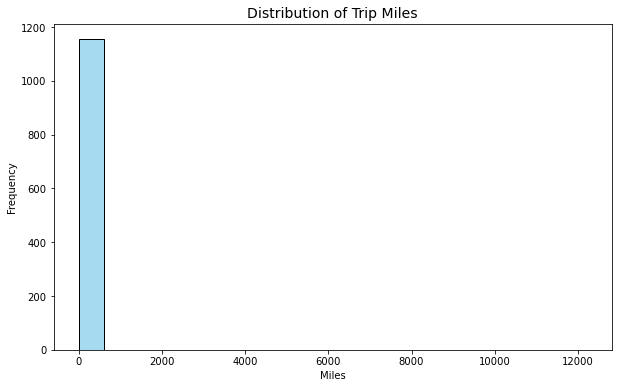

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MILES', bins=20, color='skyblue')
plt.title('Distribution of Trip Miles', fontsize=14)
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()


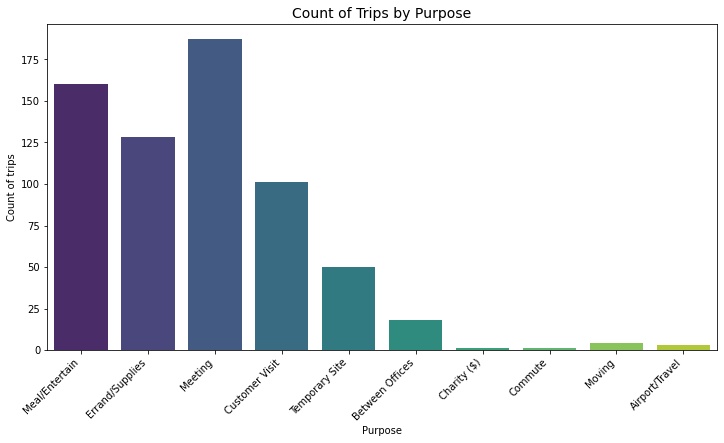

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='PURPOSE', palette='viridis')
plt.title('Count of Trips by Purpose', fontsize=14)
plt.xlabel('Purpose')
plt.ylabel('Count of trips')
plt.xticks(rotation=45, ha='right')
plt.show()




In [27]:
least_5_start_stations = df['START'].value_counts().nsmallest(5)


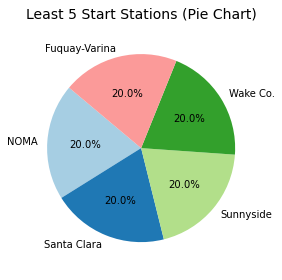

In [30]:
least_5_start_stations = df['START'].value_counts().nsmallest(5)

plt.figure(figsize=(4, 4))
plt.pie(least_5_start_stations, labels=least_5_start_stations.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Least 5 Start Stations (Pie Chart)', fontsize=14)
plt.axis('equal') 
plt.tight_layout()
plt.show()

In [31]:
least_5_stop_stations = df['STOP'].value_counts().nsmallest(5)


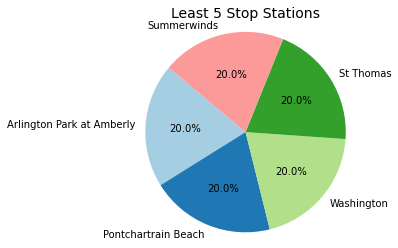

In [35]:
least_5_stop_stations = df['STOP'].value_counts().nsmallest(5)

plt.figure(figsize=(4, 4))
plt.pie(least_5_stop_stations, labels=least_5_stop_stations.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Least 5 Stop Stations', fontsize=14)
plt.axis('equal')  

plt.show()
